## Problem Statement :Predicting survival in the Titanic data set through Decision Tree
You can use only PClass, Sex, Age, SibSp, Parch and Fare to predict whether a passenger survived or not

## Preparing the Titanic dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn import tree,metrics,model_selection,preprocessing
from sklearn.preprocessing import Imputer

In [2]:
#load titantic data
url = 'https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'
titanic = pd.read_csv(url)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#Changing Sex from String to categorical
le_sex = preprocessing.LabelEncoder()
titanic.Sex = le_sex.fit_transform(titanic.Sex)
titanic.Sex.head()

0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int64

In [4]:
titanic.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


From the above, We see that the survival rate is the 38%.It looks like we have some incomplete values for Age (714 non-null values of a total 891)

In [5]:
le_Age = preprocessing.LabelEncoder()
titanic.Age = le_sex.fit_transform(titanic.Age)

In [6]:
titanic.Age.describe()

count    891.000000
mean      66.090909
std       61.517218
min        0.000000
25%       28.000000
50%       42.000000
75%       69.000000
max      264.000000
Name: Age, dtype: float64

In [7]:
titanic.loc[titanic['Age'] <= 16, 'Age'] = 0
titanic.loc[(titanic['Age'] > 16) & (titanic['Age'] <= 28), 'Age'] = 1
titanic.loc[(titanic['Age'] > 28) & (titanic['Age'] <= 42), 'Age'] = 2
titanic.loc[(titanic['Age'] > 42) & (titanic['Age'] <= 69), 'Age'] = 3
titanic.loc[titanic['Age'] > 69, 'Age'] = 4

In [8]:
le_Fare = preprocessing.LabelEncoder()
titanic.Fare = le_Fare.fit_transform(titanic.Fare)
titanic.Fare.describe()

count    891.000000
mean     105.355780
std       70.082521
min        0.000000
25%       40.500000
50%       94.000000
75%      157.000000
max      247.000000
Name: Fare, dtype: float64

In [9]:
# select features
X = titanic[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare']]
X.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,1,1,0,18
1,1,1,0,3,1,0,207
2,1,3,0,2,0,0,41
3,1,1,0,3,1,0,189
4,0,3,1,3,0,0,43


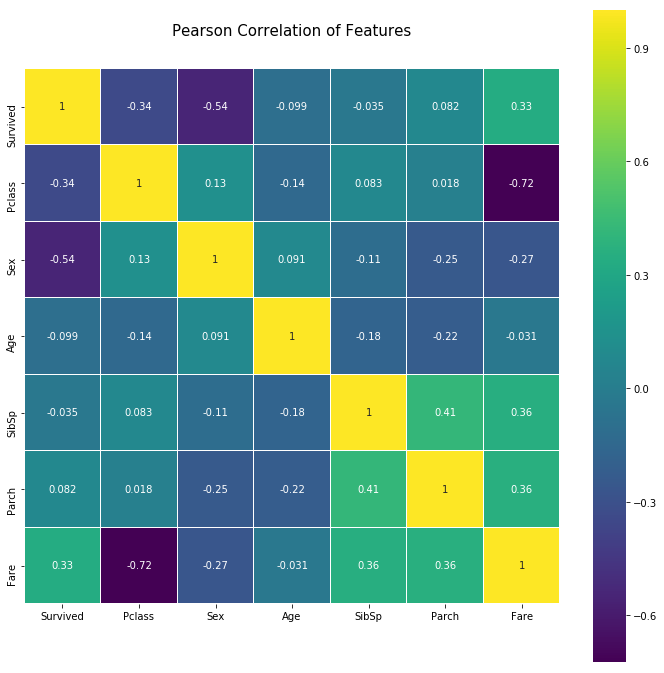

In [10]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sb.heatmap(X.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

The above shows that Sex has the highest correlations with the class (Survived): -0.54

In [11]:
X[['Sex', 'Survived']].groupby(['Sex'], as_index=False).agg(['mean', 'count', 'sum'])

Survived           
         mean count  sum
Sex                     
0    0.742038   314  233
1    0.188908   577  109

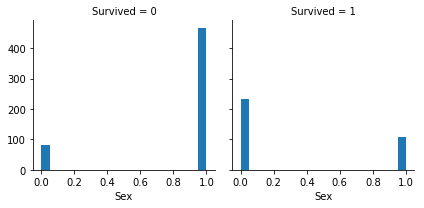

In [12]:
g = sb.FacetGrid(X, col='Survived')
g.map(plt.hist, 'Sex', bins=20)

In [13]:
# Pclass correlations with the class (Survived): -0.34
X[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).agg(['mean', 'count', 'sum'])

Survived           
            mean count  sum
Pclass                     
1       0.629630   216  136
2       0.472826   184   87
3       0.242363   491  119

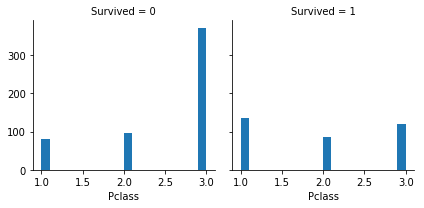

In [14]:
g = sb.FacetGrid(X, col='Survived')
g.map(plt.hist, 'Pclass', bins=20)

In [15]:
# Fare correlations with the class (Survived): 0.33
X[['Fare', 'Survived']].groupby(['Fare'], as_index=False).agg(['mean', 'count', 'sum'])

Survived          
          mean count sum
Fare                    
0     0.066667    15   1
1     0.000000     1   0
2     0.000000     1   0
3     0.000000     1   0
4     0.000000     1   0
5     0.000000     1   0
6     0.000000     2   0
7     0.000000     2   0
8     0.000000     1   0
9     0.000000     1   0
10    0.500000     2   1
11    0.000000     1   0
12    0.000000     7   0
13    0.000000     2   0
14    0.000000     4   0
15    1.000000     1   1
16    0.250000    12   3
17    0.266667    15   4
18    0.076923    13   1
19    0.000000     1   0
20    0.333333     3   1
21    0.000000     1   0
22    0.250000     4   1
23    0.000000     1   0
24    0.250000     4   1
25    0.000000     1   0
26    0.000000     1   0
27    0.500000     4   2
28    0.500000     2   1
29    0.000000     1   0
...        ...   ...  ..
218   1.000000     2   2
219   1.000000     1   1
220   0.500000     2   1
221   1.000000     3   3
222   0.500000     2   1
223   1.000000     3   3
224   1.000000     2   2
225   0.750000     4   3
226   1.000000     2   2
227   1.000000     2   2
228   0.500000     2   1
229   0.500000     2   1
230   0.750000     4   3
231   0.666667     3   2
232   1.000000     4   4
233   1.000000     2   2
234   1.000000     2   2
235   0.666667     3   2
236   1.000000     2   2
237   0.500000     4   2
238   0.666667     3   2
239   1.000000     2   2
240   1.000000     3   3
241   0.000000     1   0
242   0.000000     1   0
243   0.750000     4   3
244   0.500000     2   1
245   1.000000     2   2
246   0.500000     4   2
247   1.000000     3   3

[248 rows x 3 columns]

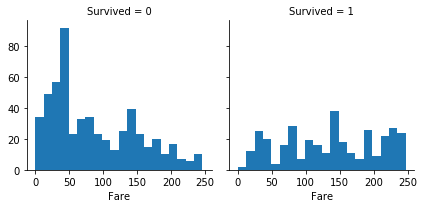

In [16]:
g = sb.FacetGrid(X, col='Survived')
g.map(plt.hist, 'Fare', bins=20)

In [17]:
# Age correlations with the class (Survived): -0.099
X[['Age', 'Survived']].groupby(['Age'], as_index=False).agg(['mean', 'count', 'sum'])

Survived          
         mean count sum
Age                    
0    0.579710    69  40
1    0.358025   162  58
2    0.395349   215  85
3    0.415929   226  94
4    0.296804   219  65

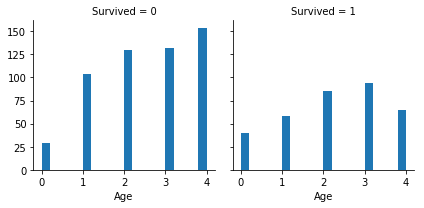

In [18]:
g = sb.FacetGrid(X, col='Survived')
g.map(plt.hist, 'Age', bins=20)

In [19]:
# Parch correlations with the class (Survived): 0.082
X[['Parch', 'Survived']].groupby(['Parch'], as_index=False).agg(['mean', 'count', 'sum'])

Survived           
           mean count  sum
Parch                     
0      0.343658   678  233
1      0.550847   118   65
2      0.500000    80   40
3      0.600000     5    3
4      0.000000     4    0
5      0.200000     5    1
6      0.000000     1    0

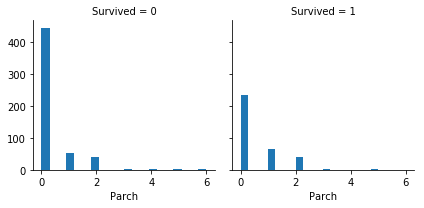

In [20]:
g = sb.FacetGrid(X, col='Survived')
g.map(plt.hist, 'Parch', bins=20)

In [21]:
# SibSp correlations with the class (Survived): -0.035
X[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).agg(['mean', 'count', 'sum'])

Survived           
           mean count  sum
SibSp                     
0      0.345395   608  210
1      0.535885   209  112
2      0.464286    28   13
3      0.250000    16    4
4      0.166667    18    3
5      0.000000     5    0
8      0.000000     7    0

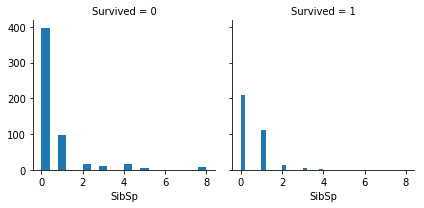

In [22]:
g = sb.FacetGrid(X, col='Survived')
g.map(plt.hist, 'SibSp', bins=20)

In [23]:
X = X.drop(['Survived'], axis=1)
y = titanic['Survived']

In [24]:
# split data randomly into 70% training and 30% test
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=0)

In [25]:
# train the decision tree
dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [26]:
# use the model to make predictions with the test data
y_pred = dtree.predict(X_test)

In [27]:
# Evaluate the model's performance
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 47
Accuracy: 0.82


In [29]:
#Cross Validation
from sklearn.cross_validation import KFold

cv = KFold(n=len(X),  # Number of elements
           n_folds=10,            # Desired number of cv folds
           random_state=12)

In [30]:
fold_accuracy = []

# titanic_train["Sex"] = encoded_sex

for train_fold, valid_fold in cv:
    train = X.loc[train_fold] # Extract train data with cv indices
    valid = X.loc[valid_fold] # Extract valid data with cv indices
    
    train_y = y.loc[train_fold]
    valid_y = y.loc[valid_fold]
    
    model = dtree.fit(X = train, 
                           y = train_y)
    valid_acc = model.score(X = valid, 
                            y = valid_y)
    fold_accuracy.append(valid_acc)    

print("Accuracy per fold: ", fold_accuracy, "\n")
print("Average accuracy: ", sum(fold_accuracy)/len(fold_accuracy))

Accuracy per fold:  [0.8222222222222222, 0.8651685393258427, 0.7752808988764045, 0.8539325842696629, 0.7865168539325843, 0.8202247191011236, 0.7865168539325843, 0.7752808988764045, 0.8876404494382022, 0.8314606741573034] 

Average accuracy:  0.8204244694132334


## Predicting whether a given passenger survived or not

In [ ]:
# Let's predict the survival of a person. Assume a male, with
#Age = 22
#PClass = 3 
#sibsp = 1
#PArch = 0
#Fare = 7

In [33]:
person = np.array([1,22,3,2,0,7])
person = np.reshape(person, (-1, 6))
dtree.predict(person)

array([0], dtype=int64)

The example person did not survive!